In [14]:
#from __future__ import division, unicode_literals

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation as ani
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
#plt.style.use('ggplot')

import numpy.random as rd
import sklearn.datasets as ds
import scipy.stats as st
from sklearn import datasets
import math
import sklearn.decomposition as decomp
from matplotlib import cm

### carsデータセット

In [15]:
data = pd.read_csv("https://github.com/matsuken92/Qiita_Contents/raw/master/math_for_programmer/data/cars.csv", 
                   index_col=0)
data.speed = data.speed.apply(lambda x: x * 1.61)
data.dist = data.dist.apply(lambda y: y * 0.3048)
data.head()


,speed,dist
1,6.44,0.6096
2,6.44,3.0480
3,11.27,1.2192
4,11.27,6.7056
5,12.88,4.8768


/Users/matsuken/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


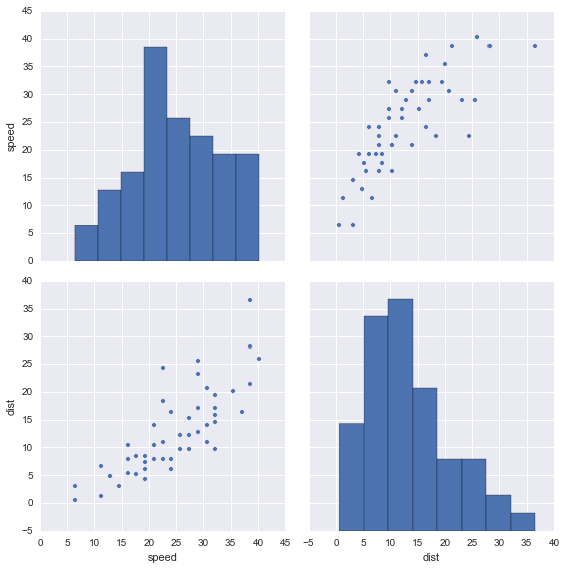

In [5]:
sns.pairplot(data, size=4, diag_kws={'bins':8})

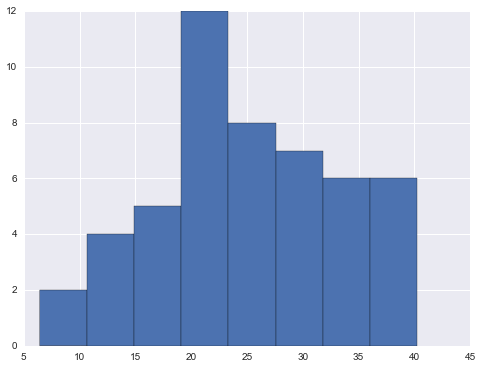

In [4]:
data.speed.hist(bins=8, figsize=(8,6))

### 分散の説明

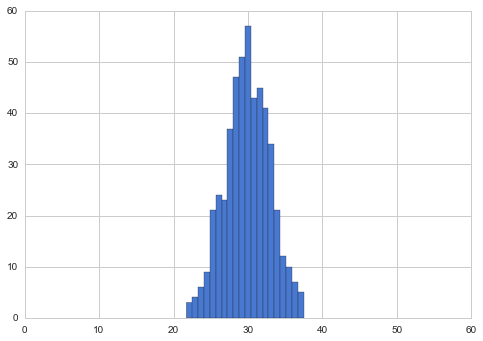

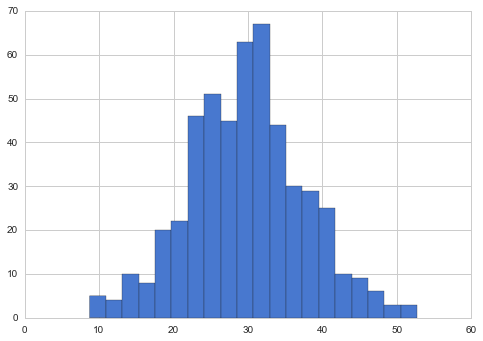

In [24]:
x1 = rd.normal(30, 3, 500)
x2 = rd.normal(30, 8, 500)

plt.xlim(0, 60)
plt.hist(x1, bins=20)
plt.show()

plt.xlim(0, 60)
plt.hist(x2, bins=20)
plt.show()

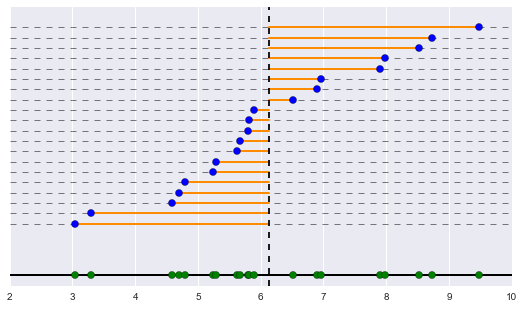

In [5]:
# 偏差のビジュアライズ

# 分散とは平均とデータ点の距離の二乗和をデータ数（-1）で割ったもの

np.random.seed(0)
xmin = 2
xmax = 10
num = 20

# 平均5, 標準偏差2の正規分布に従う乱数20個生成
x = np.sort(np.random.normal(5, 2, num))
zz = np.zeros_like(x)
y = np.array(range(num)) + 5
mean = np.average(x)

xx = np.linspace(xmin, xmax, 100)

# 描画処理 
plt.figure(figsize=(9,5))

plt.scatter(x, zz, s=50, c="g", zorder=100)
plt.scatter(x, y, s=50, c="b", zorder=100)

plt.plot([xmin, xmax],[0, 0],"k", lw=2)
for i in range(num):
    plt.plot([xmin, xmax],[i+5, i+5],"k--", lw=.5)

    left = min(x[i], mean)
    right = max(x[i], mean)
    plt.plot([left, right],[i+5, i+5], c="darkorange", lw=2)

plt.plot([mean, mean],[-10, 30], "k--")
plt.yticks([])
plt.xlim(xmin, xmax)
plt.ylim(-1, 26)
plt.show()

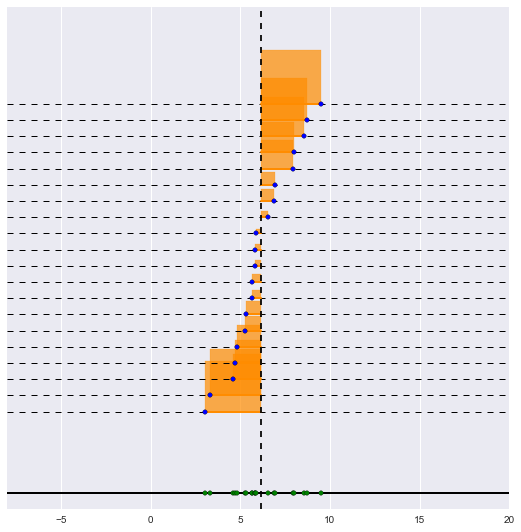

In [6]:
# 分散のビジュアライズ（正方形で表すバージョン）

# 分散とは平均とデータ点の距離の二乗和をデータ数（-1）で割ったもの

np.random.seed(0)
xmin = 2
xmax = 10
num = 20

# 平均5, 標準偏差2の正規分布に従う乱数20個生成
x = np.sort(np.random.normal(5, 2, num))
zz = np.zeros_like(x)
y = np.array(range(num)) + 5
mean = np.average(x)

xx = np.linspace(xmin, xmax, 100)

# 描画
fig = plt.figure(figsize=(9,9))
plt.scatter(x, zz, s=20, c="g", zorder=100)
plt.scatter(x, y, s=20, c="b", zorder=100)

plt.plot([xmin-10, xmax+10],[0, 0],"k", lw=2)
for i in range(num):
    plt.plot([xmin-10, xmax+10],[i+5, i+5],"k--", lw=1)

    left = min(x[i], mean)
    right = max(x[i], mean)
    
    ax = fig.add_subplot(111)
    rect = matplotlib.patches.Rectangle((left, i+5), (right-left), (right-left), color='darkorange', alpha=0.7)
    ax.add_patch(rect)
    plt.plot([left, right],[i+5, i+5], c="darkorange", lw=2)


plt.plot([mean, mean],[-1, 30], "k--")
plt.yticks([])
plt.xlim(xmin-10, xmax+10)
plt.ylim(-1, 30)
plt.show()


アニメーション生成のコードを動かすには<br>
→ http://qiita.com/kenmatsu4/items/573ca0733b192d919d0e

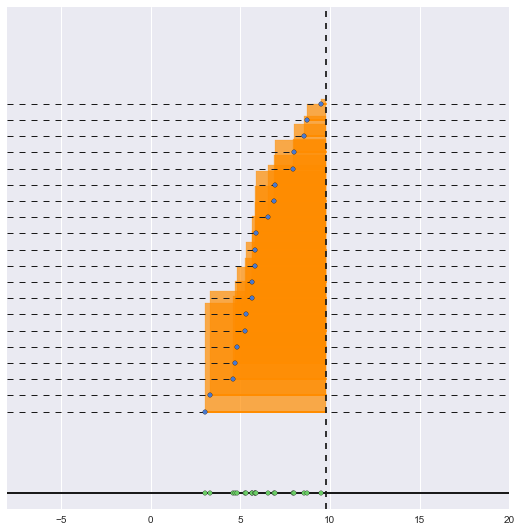

In [12]:
# 分散のビジュアライズ（正方形をアニメーションで表すバージョン）

# 分散とは平均とデータ点の距離の二乗和をデータ数（-1）で割ったもの

np.random.seed(0)
xmin = 2
xmax = 10
num = 20

# 平均5, 標準偏差2の正規分布に従う乱数20個生成
x = np.sort(np.random.normal(5, 2, num))
zz = np.zeros_like(x)
y = np.array(range(num)) + 5
mean = np.average(x)

xx = np.linspace(xmin, xmax, 100)

#fig = plt.figure(figsize=(9,9))
def animate(nframe):
    global x, y, xx, zz, mean, num_frame, xmin, xmax, num
    plt.clf()

    pos = 2 + nframe/float(num_frame)*8
    
    plt.scatter(x, zz, s=20, c="g", zorder=100)
    plt.scatter(x, y, s=20, c="b", zorder=100)

    plt.plot([xmin-10, xmax+10],[0, 0],"k", lw=2)
    for i in range(num):
        plt.plot([xmin-10, xmax+10],[i+5, i+5],"k--", lw=1)

        left = min(x[i], pos)
        right = max(x[i], pos)

        ax = fig.add_subplot(111)
        rect = matplotlib.patches.Rectangle((left, i+5), (right-left), (right-left), color='darkorange', alpha=0.7)
        ax.add_patch(rect)
        plt.plot([left, right],[i+5, i+5], c="darkorange", lw=2)


    plt.plot([pos, pos],[-1, 30], "k--")
    plt.yticks([])
    plt.xlim(xmin-10, xmax+10)
    plt.ylim(-1, 30)


num_frame = 32
fig = plt.figure(figsize=(9,9))
anim = ani.FuncAnimation(fig, animate, frames=num_frame, blit=True)
anim.save('mean_plot_sqare.gif', writer='imagemagick', fps=4, dpi=64)



### 相関係数

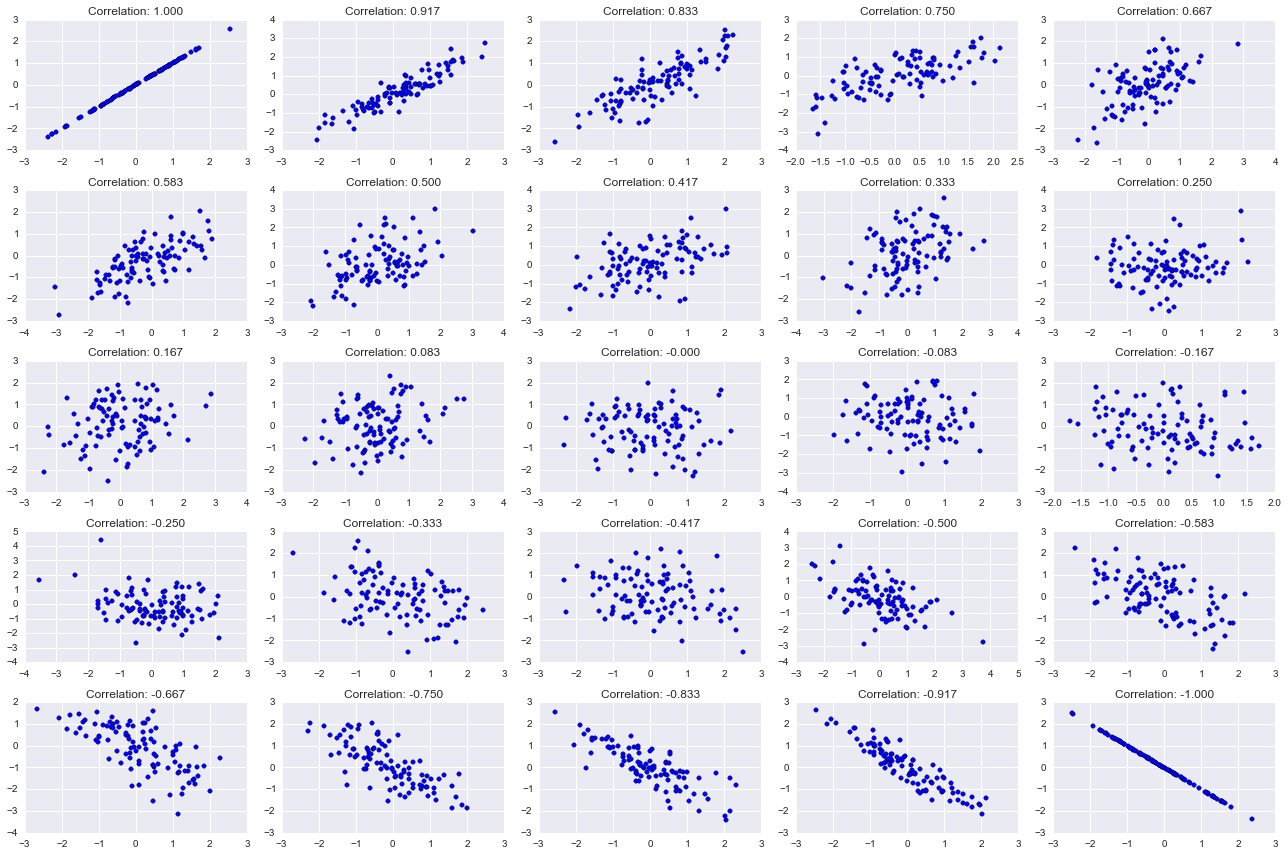

In [8]:
# 相関係数を並べて表示
nn = 5
plt.figure(figsize=(18,12))

rel = np.linspace(-1,1, nn * nn)
for n in range(nn * nn):
    plt.subplot(nn, nn, n+1)
    r = -rel[n]
    mean = [0,0]
    cov =  [[1,  r],
            [r,  1]]
    X = rd.multivariate_normal(mean, cov, size=100)
    plt.scatter(X[:,0], X[:,1])
    plt.title("Correlation: {0:.3f}".format(r))

plt.tight_layout()
plt.show()

0 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24


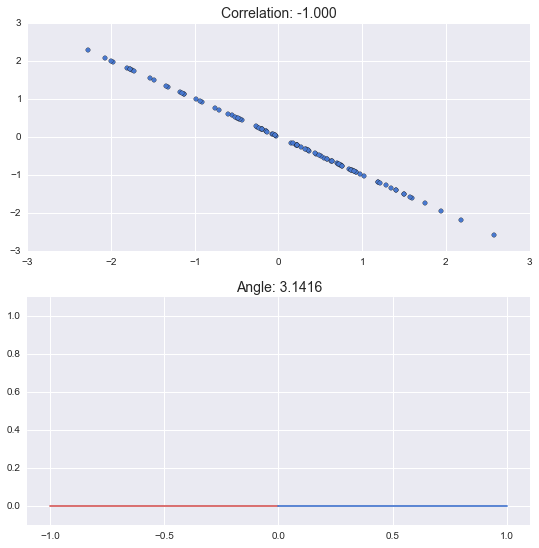

In [11]:
# 相関係数とベクトルの関係をアニメーション表示

total_frame = 25
nn = 5 # 範囲
rel = np.linspace(-1,1, nn * nn)

def animate(nframe):
    # 描画をクリアする
    plt.clf()
    plt.subplot(2,1,1)
    print nframe, 
    r = -rel[nframe]
    mean = [0,0]
    cov =  [[1,  r],
            [r,  1]]
    X = rd.multivariate_normal(mean, cov, size=100)
    plt.xlim(-3,3)
    plt.ylim(-3,3)
    plt.scatter(X[:,0], X[:,1])
    plt.title("Correlation: {0:.3f}".format(r), size=14)
    
    plt.subplot(2,1,2)
    ang =  math.acos(r)
    
    X = [1., 0.]
    Y = np.dot([[np.cos(ang), -np.sin(ang)], [np.sin(ang), np.cos(ang)]], X)
    plt.xlim(-1.1,1.1)
    plt.ylim(-0.1, 1.1)
    plt.plot([0, Y[0]], [0, Y[1]], 'r')
    plt.plot([0, 1], [0, 0], 'b')
    plt.title("Angle: {0:.4f}".format(ang), size=14)

fig = plt.figure(figsize=(9,9))
anim = ani.FuncAnimation(fig, animate, frames=total_frame, blit=True)
anim.save('correlation_anim.gif', writer='imagemagick', fps=2, dpi=64)

### 回帰分析

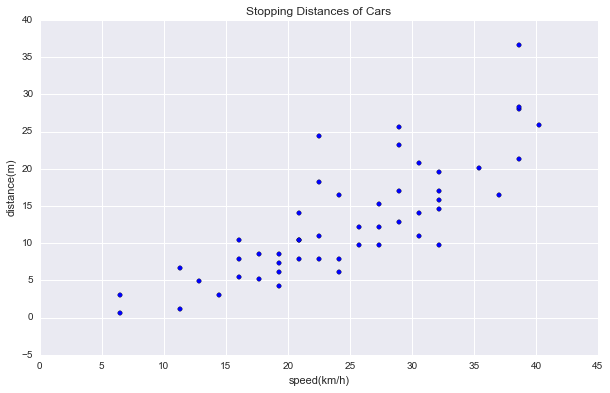

In [10]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.set_title("Stopping Distances of Cars")
ax.set_xlabel("speed(km/h)")
ax.set_ylabel("distance(m)")
plt.scatter(data.speed, data.dist)
plt.show()

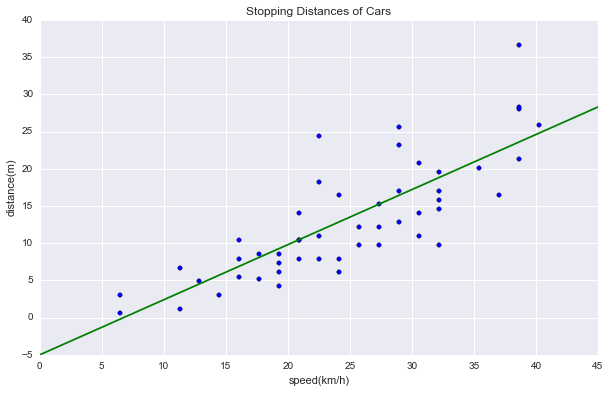

In [11]:
fig = plt.figure(figsize=(10,6))
plt.title("Stopping Distances of Cars")
plt.xlabel("speed(km/h)")
plt.ylabel("distance(m)")
plt.scatter(data.speed, data.dist)
plt.xlim(0, 45)
plt.ylim(-5, 40)
# y = 0.74x -5 の直線 ((0,-5),(50,32)を通る)
x = [0,  50]
y = [-5, 32]
plt.plot(x,y, c='g')
plt.show()

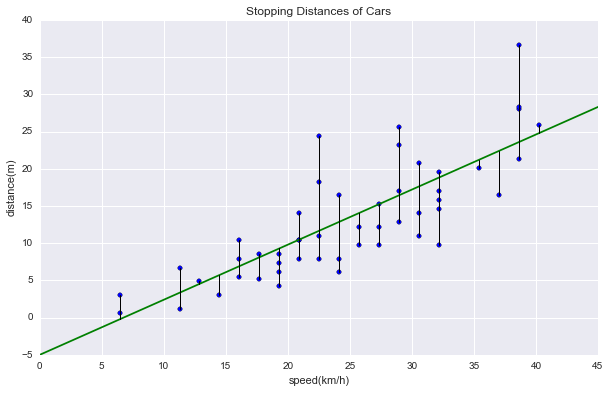

In [7]:
fig = plt.figure(figsize=(10,6))
plt.title("Stopping Distances of Cars")
plt.xlabel("speed(km/h)")
plt.ylabel("distance(m)")
plt.scatter(data.speed, data.dist)
plt.xlim(0, 45)
plt.ylim(-5, 40)

# y = 0.74x -5 の直線 ((0,-5),(50,32)を通る)
x = [0,  50]
y = [-5, 32]
plt.plot(x,y, c='g')

# draw errors
for d in data.values:
    plt.plot([d[0],d[0]],[d[1],d[0]*0.74-5],"k", lw=1)

plt.show()

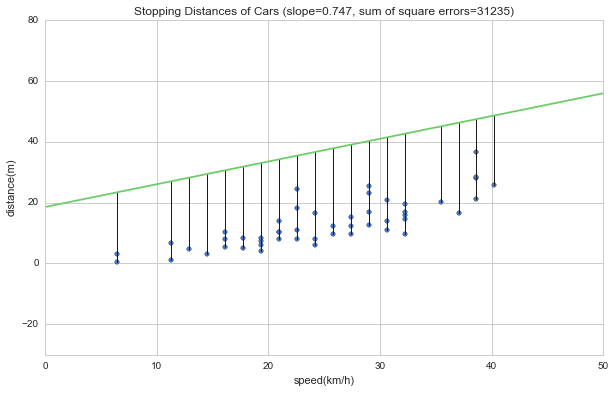

In [16]:

def animate(nframe):
    plt.clf()        # clear graph canvas
    slope = 0.746606334842 
    intercept = -5.41583710407 + (float(nframe-25)/50) * 50
    x = np.linspace(0,50,50)
    y = slope * x + intercept
    plt.ylim(-30,80)
    plt.xlim(0,50)
    plt.xlabel("speed(km/h)")
    plt.ylabel("distance(m)")
    plt.scatter(data.speed, data.dist)
    # draw errors
    se = 0
    i = 0
    for d in data.values:
        plt.plot([d[0],d[0]],[d[1],d[0]*slope+intercept],"k",lw=1)
        se += (y[i] - d[1]) ** 2
        i += 1
    plt.title("Stopping Distances of Cars (slope=%.3f, sum of square errors=%5d)" % (slope, se))

    plt.plot(x,y, 'g')


fig = plt.figure(figsize=(10,6))
total_frame = 50
anim = ani.FuncAnimation(fig, animate, frames=total_frame, blit=True)
anim.save('reg_anim.gif', writer='imagemagick', fps=3, dpi=64)

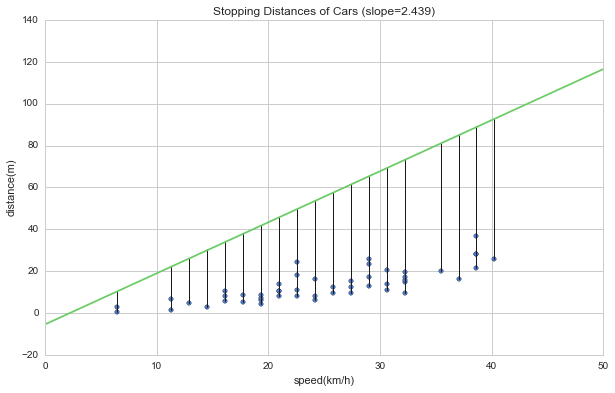

In [17]:
# animated2

#plot_list = []
def animate(nframe):
    #ims = []
    slope = 0.746606334842 * (float(nframe)/30) *2
    x = np.linspace(0,50,50)
    y = slope * x -5.41583710407
    
    plt.clf()        # clear graph canvas
    plt.xlim(0,50)
    plt.title("Stopping Distances of Cars (slope=%.3f)" % slope)
    plt.xlabel("speed(km/h)")
    plt.ylabel("distance(m)")
    plt.scatter(data.speed, data.dist)
    # draw errors
    for d in data.values:
        plt.plot([d[0],d[0]],[d[1],d[0]*slope-5],"k", lw=1)
    plt.plot(x, y, c='g')

fig = plt.figure(figsize=(10,6))
total_frame = 50
anim = ani.FuncAnimation(fig, animate, frames=total_frame, blit=True)
anim.save('reg_anim_2.gif', writer='imagemagick', fps=3, dpi=64)

/Users/matsuken/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


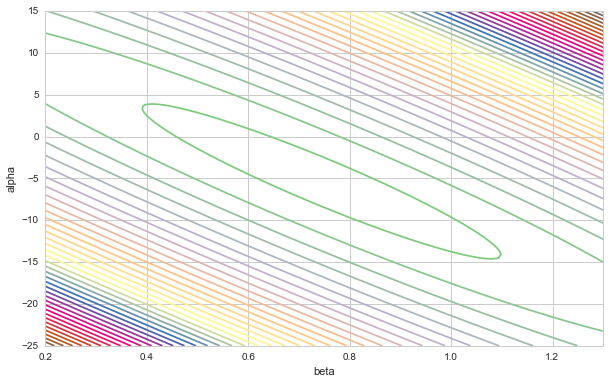

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

sns.set(style="whitegrid", palette="muted", color_codes=True)

# set field
X = np.linspace(0.2, 1.3, 100)
Y = np.linspace(-25, 15, 100)

# set data
sum_x_2 = np.sum(np.array(data.speed)**2)
sum_y_2 = np.sum(np.array(data.dist)**2)
sum_xy = np.dot(data.speed, data.dist)
sum_x = np.sum(data.speed)
sum_y = np.sum(data.dist)
X, Y = np.meshgrid(X, Y)

S = (sum_x_2 * (X**2)) + (50 * (Y**2)) + (2 * sum_x * X * Y) + (-2 * sum_xy  * X) + (-2 * sum_y * Y) + sum_y_2

# prepare plot
fig = plt.figure(figsize=(10,6))

# draw contour
plt.contour(X,Y,S,50,cmap=cm.Accent)
plt.xlabel("beta")
plt.ylabel("alpha")

plt.show()

### iris(アヤメ)データセット

In [3]:
sns.set(style="darkgrid", palette="muted", color_codes=True)
iris = datasets.load_iris()
X = iris.data
y = iris.target
df_iris = pd.DataFrame(np.column_stack([iris.data, iris.target]), 
             columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'])
df_iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10')

/Users/matsuken/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


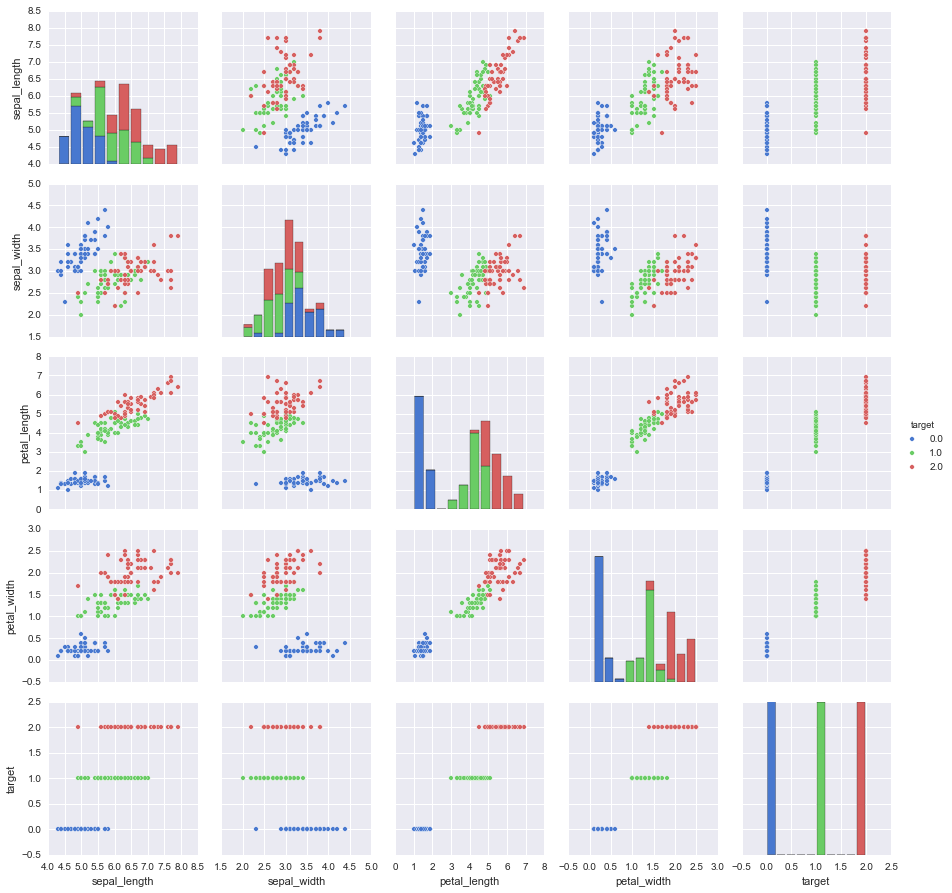

In [5]:
sns.pairplot(df_iris, hue="target")

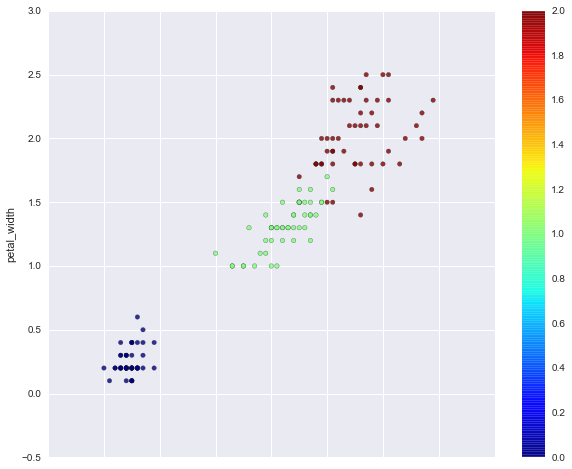

In [6]:
df_iris.plot(kind='scatter', x='petal_length', y='petal_width',
             figsize=(10,8), alpha=0.8, c=df_iris.target, colormap=cm.jet, )

explained: 0.9776


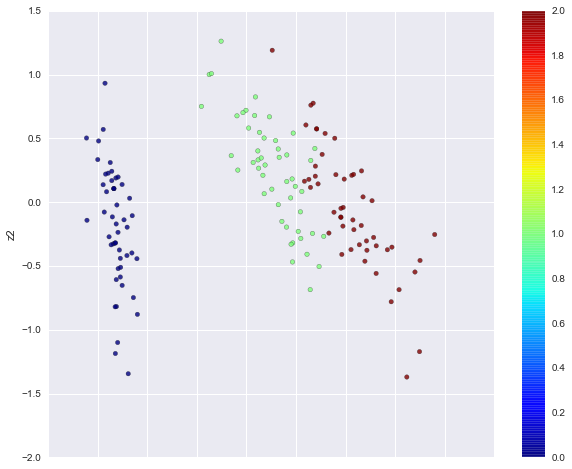

In [7]:

feature = df_iris[['sepal_length','sepal_width', 'petal_length', 'petal_width']]

n_comp = 2
pca = decomp.PCA(n_components = n_comp)
pca.fit(feature)
transformed = pca.transform(feature)
E = pca.explained_variance_ratio_
print "explained: {0:.4f}".format(np.sum(E))

iris_decomp = pd.DataFrame(np.column_stack([transformed, df_iris.target]),  columns=['z1', 'z2', 'target'])
iris_decomp.plot(kind='scatter', x='z1', y='z2', figsize=(10,8), alpha=0.8, c=iris_decomp.target, colormap=cm.jet, )

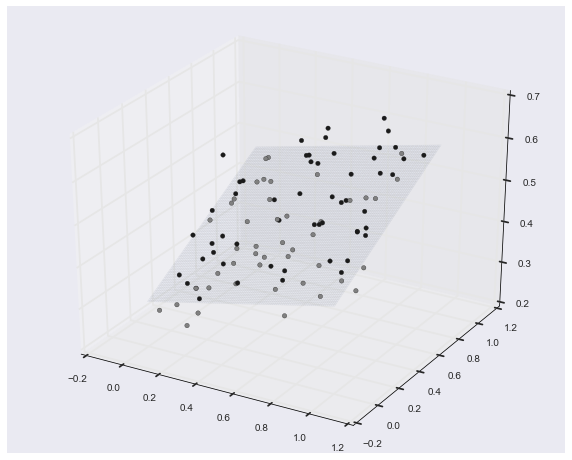

In [10]:
# Make 100 phony data points in NumPy.
X_data = np.float32(np.random.rand(2, 100)) # Random input
y_data = np.dot([0.100, 0.200], X_data) + 0.300 + rd.normal(0, 0.05, 100)

X, Y = np.meshgrid(np.linspace(0,1,100),np.linspace(0,1,100))
Z = .1*X + .2*Y + 0.3 

col = []
for x, y in zip(X_data.T, y_data):
    z = .1*x[0] + .2*x[1] + 0.3
    col.append( 'k' if y>=z else 'gray' )

# Draw 3D graph
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_data[0,:], X_data[1,:], y_data, alpha=1, c=col)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.05, zorder=300)

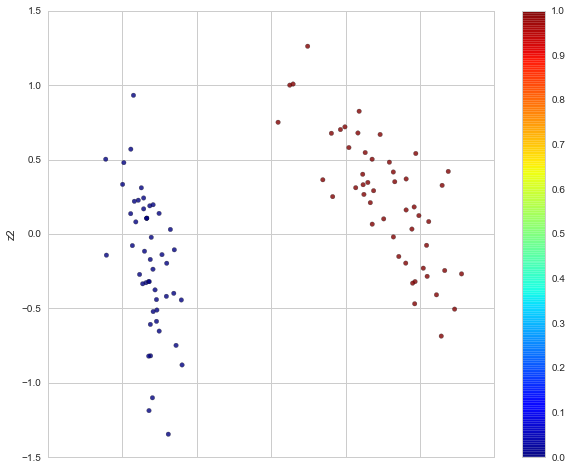

In [19]:
iris2 = iris_decomp[iris_decomp.target!=2]
iris2.plot(kind='scatter', x='z1', y='z2', figsize=(10,8), alpha=0.8, c=iris2.target, colormap=cm.jet, )

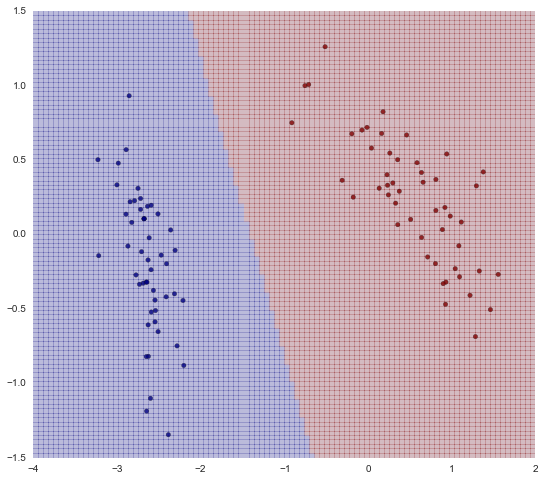

In [31]:
from sklearn import svm

from sklearn import cross_validation, datasets, svm, grid_search
from sklearn.cross_validation import cross_val_score

svc = svm.SVC(random_state=None,kernel=b'linear', C=1.0)
res = svc.fit(np.column_stack([iris2.z1, iris2.z2]), iris2.target)

xx, yy = np.meshgrid(np.linspace(-4.,2.,101),np.linspace(-1.5,1.5,101))
shape = xx.shape
f_xx = xx.flatten()
f_yy = yy.flatten()

pred = res.predict(np.column_stack([f_xx, f_yy]))

plt.figure(figsize=(9,8))
plt.xlim(-4.,2.)
plt.ylim(-1.5,1.5)
plt.pcolor(xx, yy, pred.reshape(shape), alpha=0.2, cmap=cm.jet)
plt.scatter(iris2.z1, iris2.z2, alpha=0.8, c=iris2.target, cmap=cm.jet)

### 数学・国語データ

,Math,Japanese
0,20,9
1,4,2
2,12,15
3,5,10
4,10,6
5,8,11
6,1,4
7,15,9
8,5,6


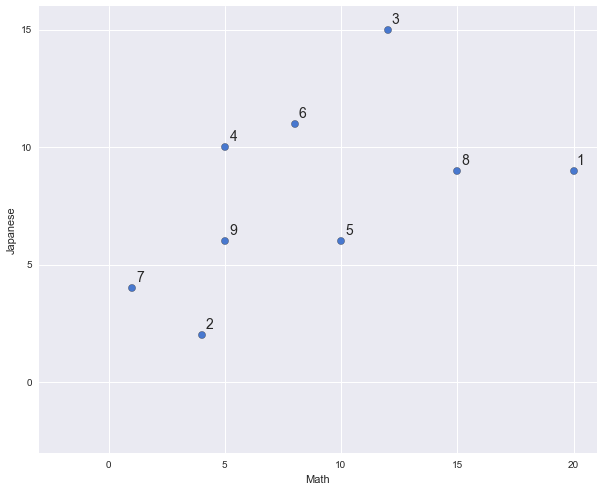

In [25]:
sns.set(style="darkgrid", palette="muted", color_codes=True)
data = np.array([[20,  4, 12,  5, 10,  8,  1, 15,  5],
                 [ 9,  2, 15, 10,  6, 11,  4,  9,  6]])

df_data = pd.DataFrame(data.T, columns=['Math', 'Japanese'])

df_data.plot(kind='scatter', x='Math', y='Japanese', c="b", figsize=(10,8), s=50)
plt.xlim(-3, 21)
plt.ylim(-3, 16)
for i in range(data.shape[1]):
    plt.text(data[0][i]+.2 ,data[1][i]+.3, "{}".format(i+1), size=14)

df_data

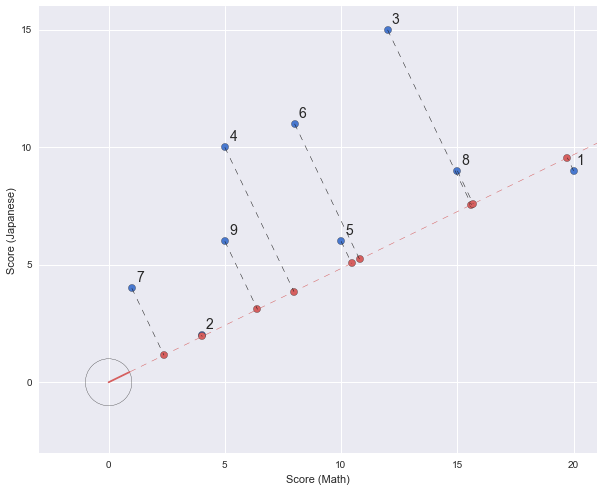

In [26]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
#df_data.plot(kind='scatter', x='Math', y='Japanese', c="b", figsize=(10,8), s=50, ax=ax)

ax.scatter(df_data.Math, df_data.Japanese, s=50)

a1 = .9
assert a1 >= 0 and a1 <= 1
a2 = np.sqrt(1-a1**2)
a = np.array([a1, a2])
plt.xlim(-3, 21)
plt.ylim(-3, 16)

plt.xlabel("Score (Math)")
plt.ylabel("Score (Japanese)")

ax.plot([0, a1], [0, a2], c='r')
ax.plot([0, a1*30], [0, a2*30], 'r--', lw=.5)


for i in range(data.shape[1]):
    ax.text(data[0][i]+.2 ,data[1][i]+.3, "{}".format(i+1), size=14)
    ip = data[0][i]*a1 + data[1][i]*a2
    ax.scatter(ip*a1, ip*a2, c='r', s=50)
    ax.plot([data[0][i], ip*a1], [data[1][i], ip*a2], "k--", lw=.5)

circle = plt.Circle((0,0),1, facecolor='none', )
ax.add_patch(circle)


0 32.0987654321 0 32.0987654321 1 33.398172611 2 34.5186079836 3 35.4409005901 4 36.1492697482 5 36.6315950654 6 36.8796238217 7 36.8891121762 8 36.6598977807 9 36.1959025569 10 35.5050655919 11 34.5992072976 12 33.4938271605 13 32.2078385413 14 30.7632450619 15 29.1847641171 16 27.4994039535 17 25.7360015509 18 23.9247292133 19 22.0965783124 20 20.2828290172 21 18.5145150808 22 16.8218928451 23 15.2339235458 24 13.7777777778


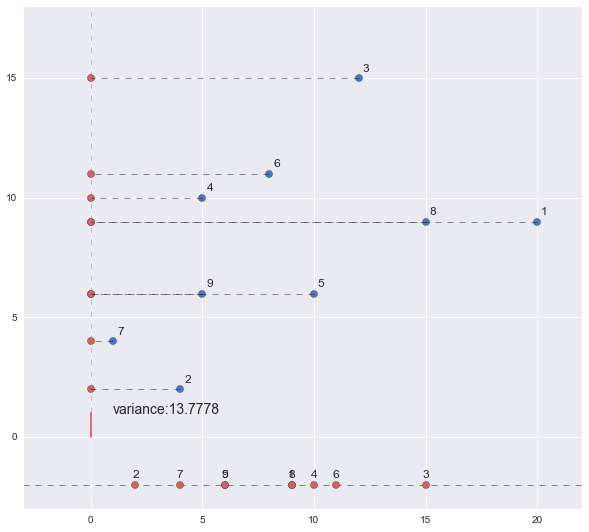

In [28]:
## PCAの過程のアニメーションß

# テストの結果データ
data = np.array([[20,  4, 12,  5, 10,  8,  1, 15,  5],
                 [ 9,  2, 15, 10,  6, 11,  4,  9,  6]])
df_data = pd.DataFrame(data.T, columns=['Math', 'Japanese'])
n = data.shape[1]

# アニメーション用 軸aの回転データ
total_frame = 25
r90 = np.pi/2.
r = [(r90*x/(total_frame-1.)) for x in range(total_frame)]
a = np.array([(np.cos(r[i]), np.sin(r[i])) for i in range(total_frame)])

def animate(nframe):
    # 描画をクリアする
    plt.clf()
    
    print nframe,   # 進捗表示
    
    # 軸の設定
    a1 = a[nframe, 0]
    a2 = a[nframe, 1]
    
    # a軸上の分散を計算
    mean = np.dot([a1, a2], np.mean(data, axis=1))
    V = np.sum((np.dot([a1, a2], data) - mean)**2)/n
    print V, 
    plt.text(1,1,"variance:{0:.4f}".format(V), size=14)
    
    # データ点の描画
    plt.scatter(data.T[:,0], data.T[:,1], s=50)

    # 描画範囲の設定
    plt.xlim(-3, 22)
    plt.ylim(-3, 18)

    # 軸の描画
    plt.plot([0, a1], [0, a2], c='r')
    plt.plot([0, a1*30], [0, a2*30], 'r--', lw=.5)

    # データから軸aに垂線を下ろす
    for i in range(n):
        plt.text(data[0][i]+.2 ,data[1][i]+.3, "{}".format(i+1), size=12)
        ip = data[0][i]*a1 + data[1][i]*a2
        plt.scatter(ip*a1, ip*a2, s=50, c='r')
        plt.plot([data[0][i], ip*a1], [data[1][i], ip*a2], "k--", lw=.5)
        
        plt.text(ip-.13 ,-1.7, "{}".format(i+1), size=12)
        plt.scatter([ip], [-2], s=50, c='r', zorder=100)
    plt.plot([-10,30],[-2,-2], "k--", lw=.5, zorder=0)
    #plt.show()
        
fig = plt.figure(figsize=(10,9))
anim = ani.FuncAnimation(fig, animate, frames=total_frame, blit=True)
anim.save('PCA_anim.gif', writer='imagemagick', fps=2, dpi=64)

0 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38


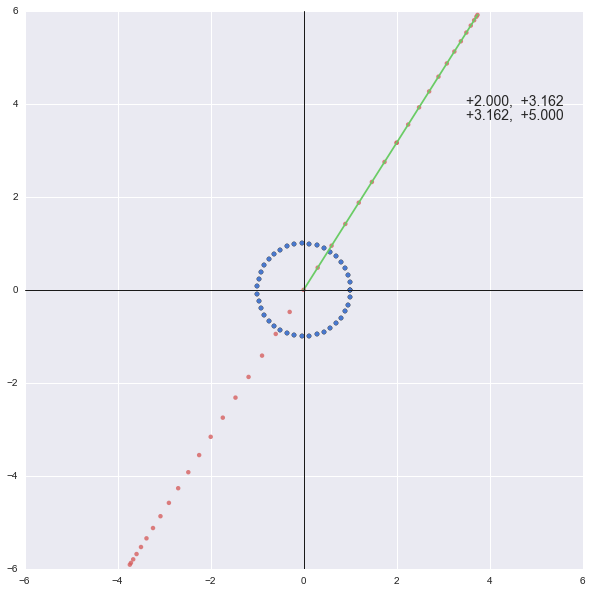

In [29]:
# アニメーション
# 円に対して分散共分散行列を掛けてみる

r360 = 2*np.pi
n = 40
c = [(r360*x/(n-1.)) for x in range(n)]
r = np.array([(np.cos(c[i]), np.sin(c[i])) for i in range(n)])

xmin = -6
xmax =  6

s_11 = 2.0
s_22 = 5.0

total_frame = 39
def animate(nframe):
    # 描画をクリアする
    plt.clf()
    print nframe,
    s_12 = (nframe-19)/19. * np.sqrt(s_11*s_22)

    #print np.sqrt(s_11*s_22), s_12
    assert np.abs(s_12) <= np.sqrt(s_11*s_22)   # 共分散の上限チェック

    S = [[s_11, s_12],
         [s_12, s_22]]
    a = np.dot(r, S)
    
    la, v = np.linalg.eig(S)
    #print "la",la
    #print "v", v
    
    plt.text(3.5, 4.0, u"{0:+.3f},  {1:+.3f}".format(s_11, s_12), size=14)
    plt.text(3.5, 3.7, u"{0:+.3f},  {1:+.3f}".format(s_12, s_22), size=14)

    plt.plot([0,v[0,0]*la[0]], [0,v[1,0]*la[0]], 'k')
    plt.plot([0,-v[0,1]*la[1]], [0,-v[1,1]*la[1]], 'g')
    
    plt.scatter(a[:,0],a[:,1], facecolor="r", edgecolors='none', alpha=.8)
    plt.scatter(r[:,0], r[:,1])
    #plt.title("cov: {0:.4f}".format(s_12))

    plt.plot([xmin,xmax],[0,0],"k", linewidth=1)
    plt.plot([0,0],[xmin,xmax],"k", linewidth=1)
    plt.xlim(xmin, xmax)
    plt.ylim(xmin, xmax)
    #plt.show()
    
fig = plt.figure(figsize=(10,10))
anim = ani.FuncAnimation(fig, animate, frames=total_frame, blit=True)
anim.save('var_cov_anim.gif', writer='imagemagick', fps=2, dpi=64)

0 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38


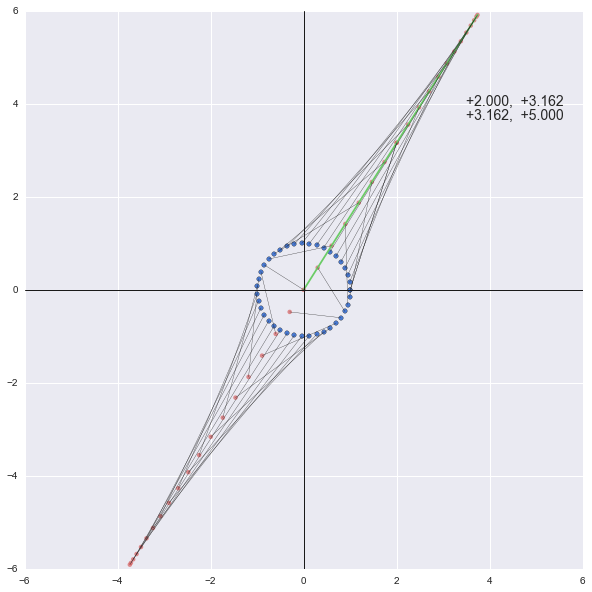

In [30]:
# アニメーション
# 円に対して分散共分散行列を掛けてみる

r360 = 2*np.pi
n = 40
c = [(r360*x/(n-1.)) for x in range(n)]
r = np.array([(np.cos(c[i]), np.sin(c[i])) for i in range(n)])

xmin = -6
xmax =  6

s_11 = 2.0
s_22 = 5.0

total_frame = 39
def animate(nframe):
    # 描画をクリアする
    plt.clf()
    print nframe,
    s_12 = (nframe-19)/19. * np.sqrt(s_11*s_22)

    #print np.sqrt(s_11*s_22), s_12
    assert np.abs(s_12) <= np.sqrt(s_11*s_22)   # 共分散の上限チェック

    S = [[s_11, s_12],
         [s_12, s_22]]
    a = np.dot(r, S)
    
    la, v = np.linalg.eig(S)
    #print "la",la
    #print "v", v
    
    plt.text(3.5, 4.0, u"{0:+.3f},  {1:+.3f}".format(s_11, s_12), size=14)
    plt.text(3.5, 3.7, u"{0:+.3f},  {1:+.3f}".format(s_12, s_22), size=14)

    plt.plot([0,v[0,0]*la[0]], [0,v[1,0]*la[0]], 'k')
    plt.plot([0,-v[0,1]*la[1]], [0,-v[1,1]*la[1]], 'g')
    
    plt.scatter(a[:,0],a[:,1], facecolor="r", edgecolors='none', alpha=.7)
    plt.scatter(r[:,0], r[:,1])
    
    for i in range(n):
        plt.plot([a[:,0][i], r[:,0][i]], [a[:,1][i], r[:,1][i]], "k", lw=.3)
    
    #plt.title("cov: {0:.4f}".format(s_12))

    plt.plot([xmin,xmax],[0,0],"k", linewidth=1)
    plt.plot([0,0],[xmin,xmax],"k", linewidth=1)
    plt.xlim(xmin, xmax)
    plt.ylim(xmin, xmax)
    #plt.show()
    
fig = plt.figure(figsize=(10,10))
anim = ani.FuncAnimation(fig, animate, frames=total_frame, blit=True)
anim.save('var_cov_anim_2.gif', writer='imagemagick', fps=2, dpi=64)